In [1]:
import os
import argparse
import shutil
import timeit
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import torch.backends.cudnn as cudnn
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from torch import autograd
from torchvision.utils import save_image
import csv
from tqdm import tqdm
import gc
import h5py
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
import torch.optim as optim
from torchvision import datasets
import torchvision.transforms as transforms
from tqdm import tqdm

In [2]:
dataset_type = "CIFAR10"

In [3]:
# 不同的transform
if dataset_type == "MNIST":
	transform = transforms.Compose([transforms.ToTensor(),transforms.Resize([32,32])])
	train_dataloader = DataLoader(datasets.MNIST('./static/data/MNIST/MNIST', train=True, download=True, transform=transform), batch_size=128, shuffle=True)
	test_dataloader = DataLoader(datasets.MNIST('./static/data/MNIST/MNIST', train=False, download=True, transform=transform), batch_size=256, shuffle=True)
elif dataset_type == "CIFAR10":
	transform = transforms.Compose([transforms.ToTensor()]) #CIFAR10数据集的均值和方差，多处网络验证
	train_dataloader = DataLoader(datasets.CIFAR10('./static/data/CIFAR10/CIFAR10', train=True, download=True, transform=transform), batch_size=100, shuffle=True)
	test_dataloader = DataLoader(datasets.CIFAR10('./static/data/CIFAR10/CIFAR10', train=False, download=True, transform=transform), batch_size=100, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:

num = 0
for data in test_dataloader:
    images, labels = data
    choose_label = 9
    indx = np.where((labels==choose_label))[0]
    if num == 0:
        _labels = labels[indx]
        _images = images[indx]
    else:
        _labels = torch.cat((_labels, labels[indx]))
        _images = torch.cat((_images, images[indx]))
    num += 1

In [5]:
print(_images.shape)

torch.Size([1000, 3, 32, 32])


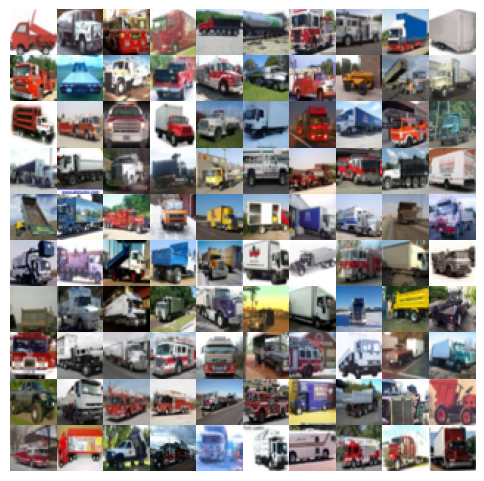

In [14]:
import random
import matplotlib.pyplot as plt

# Randomly select 100 indices from the array
indices = random.sample(range(len(_images)), 100)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(10, 10, figsize=(6, 6))
plt.subplots_adjust(wspace=0, hspace=0)

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop over the first 9 images and plot them in separate subplots
for i, idx in enumerate(indices):
    # Get the i-th image from the array
    img = _images[idx]
    img = np.array(img)
    
    # Reshape the image from (3, 64, 64) to (64, 64, 3)
    img = img.transpose((1, 2, 0))
    
    # Plot the image in the i-th subplot
    axes[i].imshow(img)
    axes[i].set_axis_off()
    
# Display the subplots
plt.show()